In [6]:
from mrcnn.config import Config
import mrcnn.model as modellib
import mrcnn.visualize as visualize
import os
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
class InferenceConfig(Config):
    """
    Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 2  # background + 2 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_RESIZE_MODE = "square"
    IMAGE_MIN_DIM = 1024
    IMAGE_MAX_DIM = 1024
    IMAGE_CHANNEL_COUNT = 3
    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 200

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 10
    
inference_config = InferenceConfig()

def load_model(MODEL_DIR):
    
    # Recreate the model in inference mode
    model = modellib.MaskRCNN(mode="inference", 
                              config=inference_config,
                              model_dir=MODEL_DIR)

    # Get path to saved weights
    # Either set a specific path or find last trained weights

    model_path = os.path.join(MODEL_DIR)
    # model_path = os.path.join(ROOT_DIR, r'/logs')
    # model_path = model.find_last()

    # Load trained weights
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)
    return model
def path_to_img(path):
    return cv.imread(path)

def prediction(model, image):
    # 모델 예측
    results = model.detect([image], verbose=1)
    r = results[0]
    return r

def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [3]:
model = load_model(r'logs/Segment_model.h5')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  logs/Segment_model.h5


In [4]:
img = path_to_img(r'E:\DataSet\CBIS-DDSM\Crop_test\Mass-Test_P_01833_RIGHT_MLO_full.png')
res = prediction(model,img)

Processing 1 images
image                    shape: (3406, 2968, 3)       min:    0.00000  max:  241.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  136.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 3406.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32



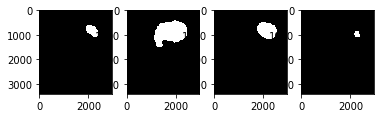

In [28]:
import matplotlib.pyplot as plt
plt.subplot(141)
plt.imshow(res['masks'][...,0], cmap='gray')
plt.subplot(142)
plt.imshow(res['masks'][...,1], cmap='gray')
plt.subplot(143)
plt.imshow(res['masks'][...,2], cmap='gray')
plt.subplot(144)
plt.imshow(res['masks'][...,3], cmap='gray')

In [34]:
res.keys()

dict_keys(['rois', 'class_ids', 'scores', 'masks'])

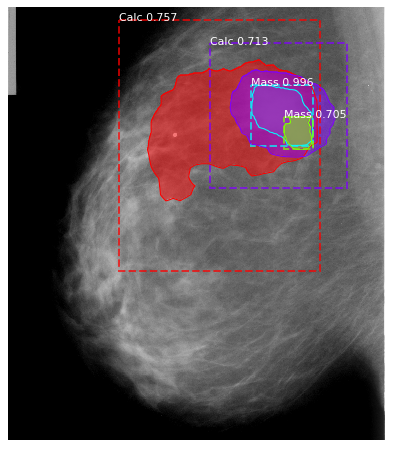

In [7]:
a = visualize.display_instances(img, res['rois'], res['masks'], res['class_ids'], 
                            ["BG",'Calc','Mass'], res['scores'], ax=get_ax())

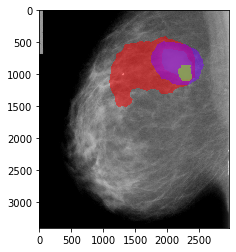

In [10]:
plt.imshow(a)